### **MOVIE RATING PREDICTION WITH PYTHON**

 ***Import Libraries***

In [24]:
import numpy as np
import pandas as pd
import os

In [25]:
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


***Upload Dataset into Google Colab***

In [26]:
from google.colab import files
uploaded = files.upload()



Saving IMDb Movies India.csv.zip to IMDb Movies India.csv.zip


**unzip**

In [28]:
import zipfile
zip_file_name = 'IMDb Movies India.csv.zip'

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/')


***Exploration Data Analysis (EDA)***

In [59]:
movie_data = pd.read_csv("IMDb Movies India.csv",encoding='latin-1' )
movie_data


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
movie_data.describe()


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [61]:
movie_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [62]:
movie_data.dtypes


Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [63]:
movie_data.isna().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [64]:
movie_data.dropna(inplace=True)
movie_data.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [65]:
movie_data.isna().sum()


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [66]:
movie_data.duplicated().sum()


0

In [67]:
movie_data['Year'] = movie_data['Year'].str.extract('(\d+)')
movie_data['Year'] = pd.to_numeric(movie_data['Year'], errors='coerce')


In [68]:
movie_data['Duration'] = movie_data['Duration'].str.extract('(\d+)')
movie_data['Duration'] = pd.to_numeric(movie_data['Duration'], errors='coerce')



In [69]:
movie_data['Votes'] = movie_data['Votes'].str.replace(',', '').astype(int)


In [70]:
directors = movie_data["Director"].value_counts()
directors.head(5)


David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Name: Director, dtype: int64

In [71]:
actors = pd.concat([movie_data['Actor 1'], movie_data['Actor 2'], movie_data['Actor 3']]).value_counts()
actors.head(5)


Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
dtype: int64

***Data Visualization***

In [72]:
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as mpl
from wordcloud import WordCloud


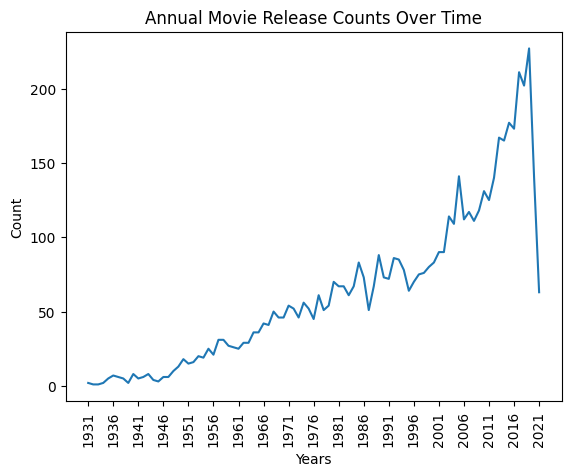

In [73]:
ax = sb.lineplot(data=movie_data['Year'].value_counts().sort_index())
tick_positions = range(min(movie_data['Year']), max(movie_data['Year']) + 1, 5)
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel("Count")
mpl.show()


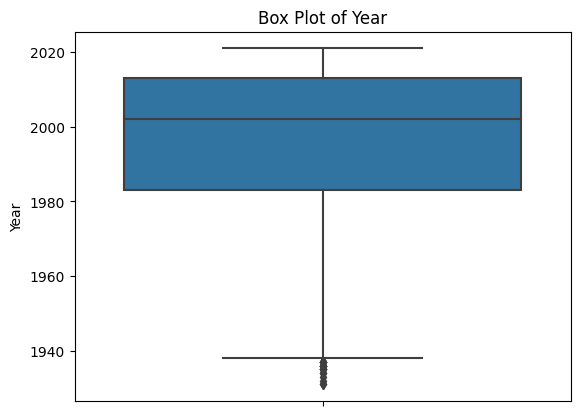

In [74]:
ax = sb.boxplot(data=movie_data, y='Year')
ax.set_ylabel('Year')
ax.set_title('Box Plot of Year')
mpl.show()


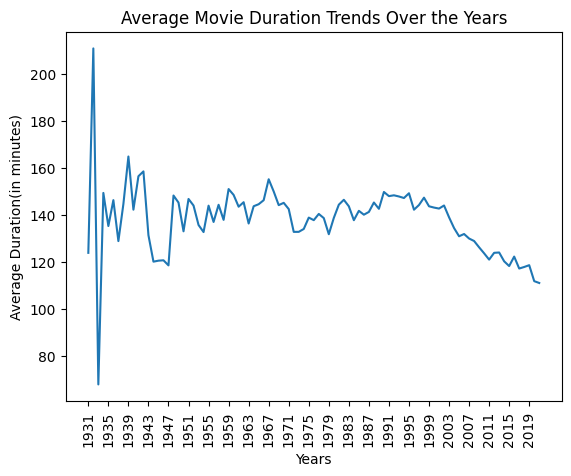

In [75]:
ax = sb.lineplot(data=movie_data.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
tick_positions = range(min(movie_data['Year']), max(movie_data['Year']) + 1, 4)
ax.set_title("Average Movie Duration Trends Over the Years")
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel('Average Duration(in minutes)')
mpl.show()


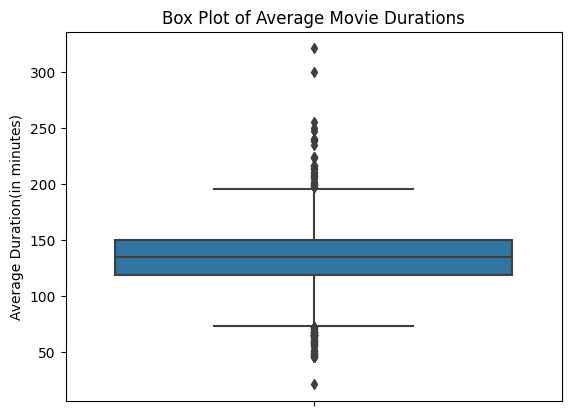

In [76]:
ax = sb.boxplot(data=movie_data, y='Duration')
ax.set_title("Box Plot of Average Movie Durations")
ax.set_ylabel('Average Duration(in minutes)')
mpl.show()


In [77]:
Q1 = movie_data['Duration'].quantile(0.25)
Q3 = movie_data['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_data = movie_data[(movie_data['Duration'] >= lower_bound) & (movie_data['Duration'] <= upper_bound)]
movie_data.head(5)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [78]:
genres=movie_data['Genre'].str.split(',',expand=True)
genres.head(5)


,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller


In [79]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1


In [80]:
genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")


 Action: 33
 Adventure: 171
 Biography: 28
 Comedy: 352
 Crime: 597
 Drama: 1926
 Family: 360
 Fantasy: 113
 History: 84
 Horror: 74
 Music: 49
 Musical: 311
 Mystery: 242
 News: 1
 Romance: 1202
 Sci-Fi: 28
 Sport: 37
 Thriller: 584
 War: 29
 Western: 1
Action: 1631
Adventure: 104
Animation: 35
Biography: 82
Comedy: 979
Crime: 266
Documentary: 36
Drama: 1810
Family: 50
Fantasy: 31
History: 8
Horror: 126
Music: 3
Musical: 87
Mystery: 59
Romance: 157
Sci-Fi: 3
Sport: 2
Thriller: 87
War: 3


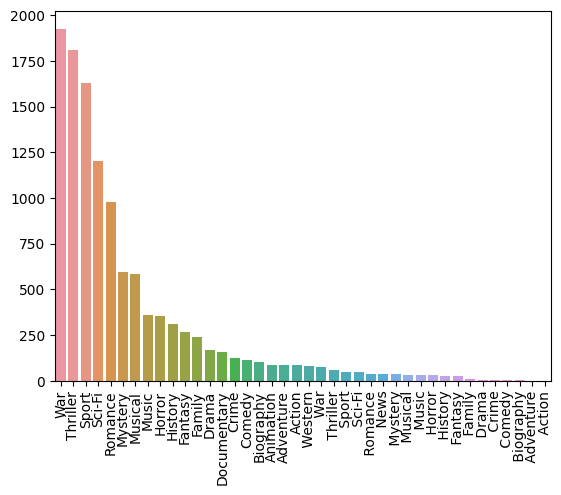

In [81]:
genreLabels = sorted(genereCounts.keys(), reverse=True)
genreCounts = sorted(genereCounts.values(), reverse=True)
ax = sb.barplot(x = genreLabels, y = genreCounts)
ax.set_xticklabels(labels=genreLabels, rotation = 90)
mpl.show()


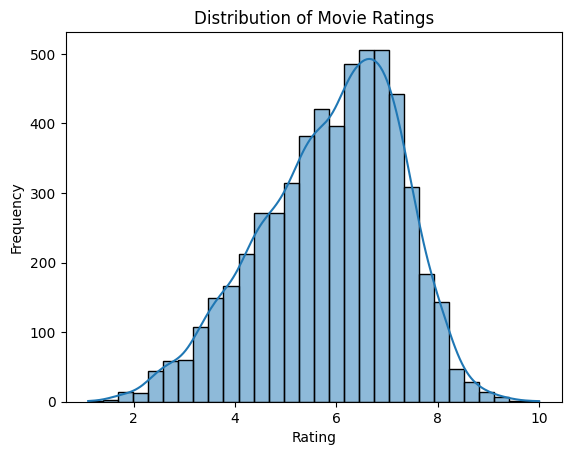

In [82]:
ax = sb.histplot(data =movie_data, x = "Rating", bins = 30, kde = True)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')
mpl.show()


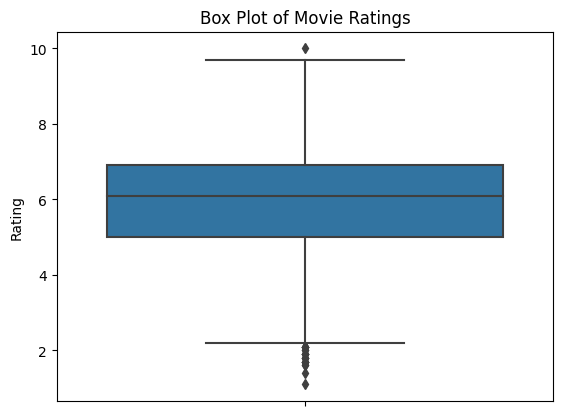

In [83]:
ax = sb.boxplot(data=movie_data, y='Rating')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Movie Ratings')
mpl.show()


In [84]:
Q1 = movie_data['Rating'].quantile(0.25)
Q3 = movie_data['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_data = movie_data[(movie_data['Rating'] >= lower_bound) & (movie_data['Rating'] <= upper_bound)]
movie_data.head(5)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [85]:
rating_votes = movie_data.groupby('Rating')['Votes'].sum().reset_index()
rating_votes


,Rating,Votes
0,2.2,20632
1,2.3,11880
2,2.4,117038
3,2.5,4057
4,2.6,16569
...,...,...
69,9.1,85354
70,9.2,36
71,9.3,132
72,9.4,81


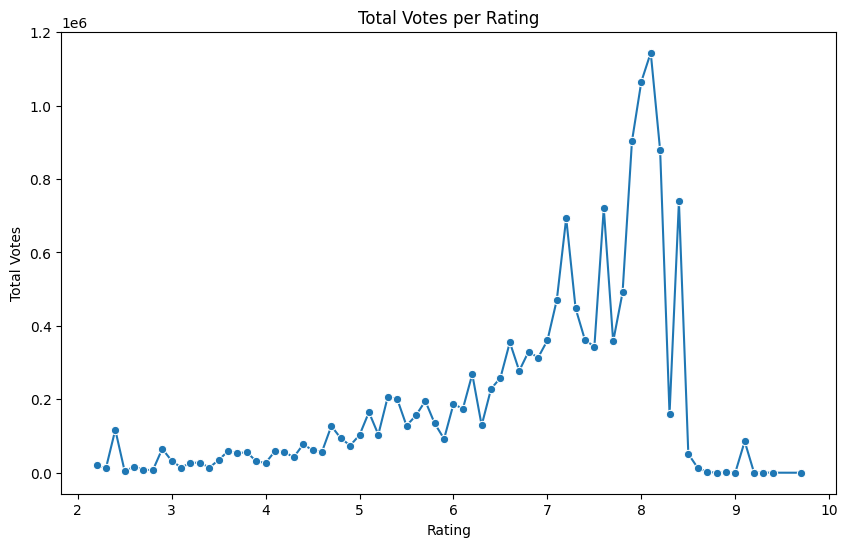

In [86]:
mpl.figure(figsize=(10, 6))
ax = sb.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax.set_xlabel('Rating')
ax.set_ylabel('Total Votes')
ax.set_title('Total Votes per Rating')
mpl.show()


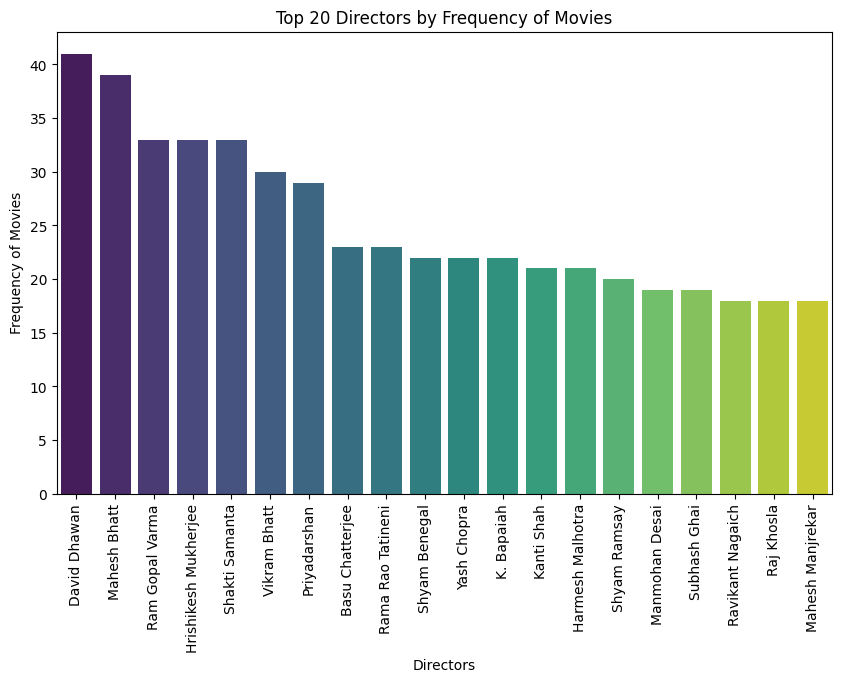

In [87]:
mpl.figure(figsize=(10, 6))
ax = sb.barplot(x=directors.head(20).index, y=directors.head(20).values, palette='viridis')
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
mpl.show()


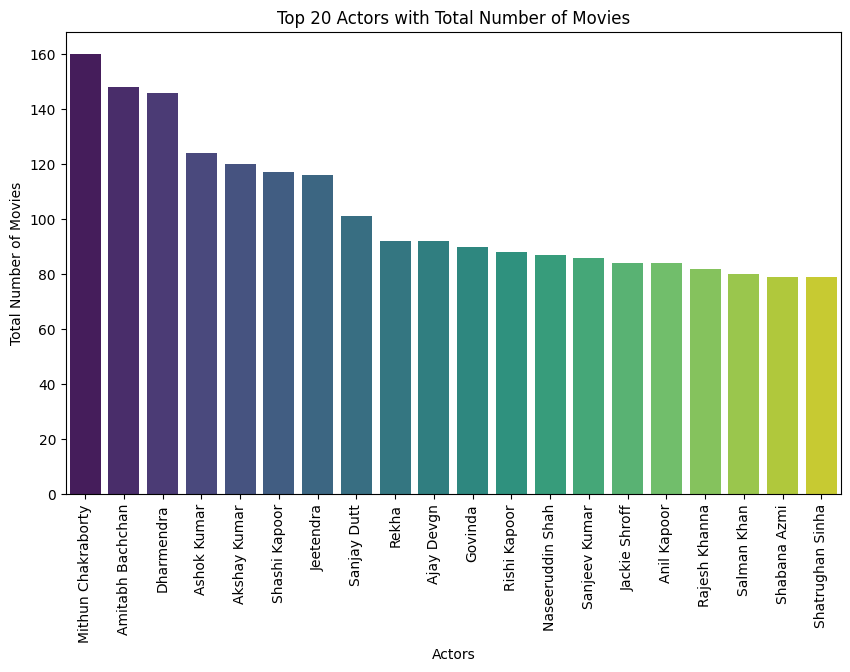

In [88]:
mpl.figure(figsize=(10, 6))
ax = sb.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
mpl.show()


In [89]:
movie_data["Actor"] = movie_data['Actor 1'] + ', ' + movie_data['Actor 2'] + ', ' + movie_data['Actor 3']
movie_data["Directors"] = movie_data['Director'].astype('category').cat.codes
movie_data["Genres"] = movie_data['Genre'].astype('category').cat.codes
movie_data["Actors"] = movie_data['Actor'].astype('category').cat.codes
movie_data.head(5)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",610,224,3788
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1305,182,3263
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1493,155,1091
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",1994,283,2036
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",133,314,5437


In [90]:
Q1 = movie_data['Genres'].quantile(0.25)
Q3 = movie_data['Genres'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_data = movie_data[(movie_data['Genres'] >= lower_bound) & (movie_data['Genres'] <= upper_bound)]
movie_data.head(5)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",610,224,3788
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1305,182,3263
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1493,155,1091
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",1994,283,2036
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",133,314,5437


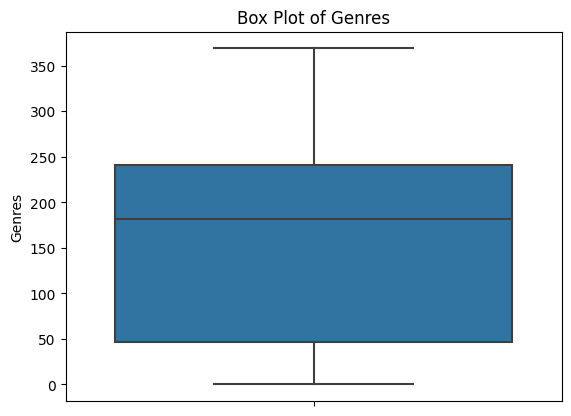

In [91]:
ax = sb.boxplot(data=movie_data, y='Genres')
ax.set_ylabel('Genres')
ax.set_title('Box Plot of Genres')
mpl.show()


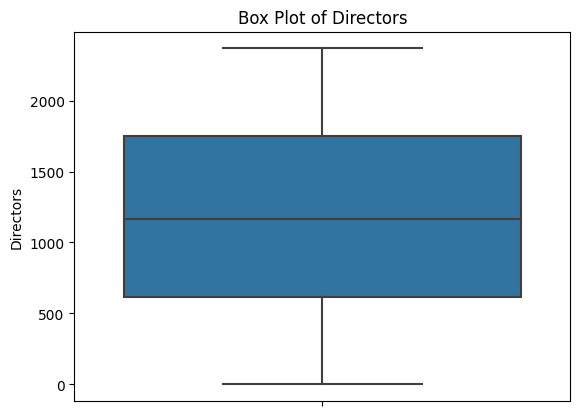

In [92]:
ax = sb.boxplot(data=movie_data, y='Directors')
ax.set_ylabel('Directors')
ax.set_title('Box Plot of Directors')
mpl.show()


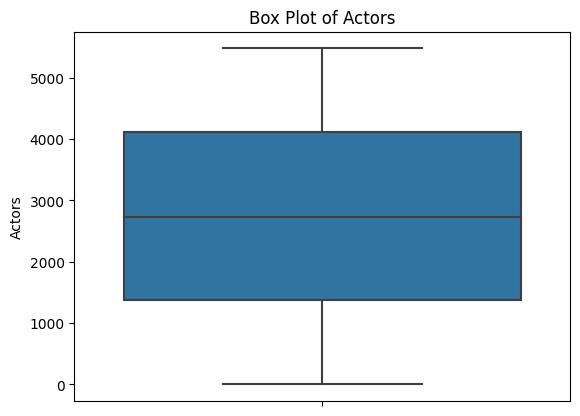

In [93]:
ax = sb.boxplot(data=movie_data, y='Actors')
ax.set_ylabel('Actors')
ax.set_title('Box Plot of Actors')
mpl.show()


***Feature Engineering***

In [95]:
input_df = movie_data[['Year',	'Duration',	'Votes',	'Directors',	'Genres',	'Actors']]
target = movie_data['Rating']
input_df.head(5)


,Year,Duration,Votes,Directors,Genres,Actors
1,2019,109,8,610,224,3788
3,2019,110,35,1305,182,3263
5,1997,147,827,1493,155,1091
6,2005,142,1086,1994,283,2036
8,2012,82,326,133,314,5437


In [96]:
target.head()


1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [97]:
x_train, x_test, y_train, y_test = train_test_split(input_df, target, test_size=0.2, random_state=5)


***Apply Linear Regression Model***

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score

LR = LinearRegression()
LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)


***Accuracy Of Linear Regression Model***

In [99]:
print("Model: Linear Regression")
print("Accuracy = {:0.2f}%".format(score(y_test, lr_preds)*100))
print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_test, lr_preds, squared=False)))


Model: Linear Regression
Accuracy = 11.52%
Mean Squared Error = 1.28



***Apply Random Forest Model***

In [100]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)


***Accuracty Of Random Forest Model***

In [101]:
print("Model: RandomForestRegressor")
print("Accuracy = {:0.2f}%".format(score(y_test, rf_preds)*100))
print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_test, rf_preds, squared=False)))


Model: RandomForestRegressor
Accuracy = 36.59%
Mean Squared Error = 1.08



***Apply KNeighborsRegressor Model***

In [102]:
from sklearn.neighbors import KNeighborsRegressor
Knn = KNeighborsRegressor(n_neighbors=5)
Knn.fit(x_train, y_train)
kne_preds = Knn.predict(x_test)


***Accuracty Of KNeighborsRegressor***

In [103]:
print("Model: KNeighborsRegressor")
print("Accuracy = {:0.2f}%".format(score(y_test, kne_preds)*100))
print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_test, kne_preds, squared=False)))


Model: KNeighborsRegressor
Accuracy = -3.75%
Mean Squared Error = 1.38

